![Kaggle Titanic Image](https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/header.png)

# Titanic - Machine Learning from Disaster
# Predicting survival on the Titanic with ML


The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we will build a predictive model that answers the question: **“what sorts of people were more likely to survive?”** using passenger data (ie name, age, gender, socio-economic class, etc).

# Goal 🎯

Predict if a passenger survived (variable) the sinking of the Titanic or not. For each in the test set, there must be a 0 or 1 value for the variable.

# Imports

Importing libraries in Python allows you to leverage existing code, extend the capabilities of your programs, improve efficiency, and benefit from specialized functionality developed by others. It promotes code reuse, collaboration, and faster development.

In [53]:
%%capture

# importing dependencies 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

1. `import numpy as np`: Imports the NumPy library, an essential package for performing numerical computations in Python, often used for array manipulation and mathematical operations.
2. `import pandas as pd`: Imports the Pandas library, which provides powerful data manipulation and analysis tools, particularly for working with structured data, such as CSV files.
3. `import os`: Imports the os module, which provides a way to interact with the operating system, allowing you to perform operations like file and directory manipulation.
4. The block starting with `for dirname, _, filenames in os.walk('/kaggle/input'):` and the subsequent nested loop iterates over files in the specified directory and prints their paths.
5. `import seaborn as sns`: Imports the Seaborn library, which is used for statistical data visualization, providing high-level functions for creating informative and aesthetically pleasing plots.
6. `import matplotlib.pyplot as plt`: Imports the Matplotlib library, a widely used plotting library in Python, allowing you to create various types of graphs and visualizations.
7. `from sklearn.preprocessing import StandardScaler`: Imports the StandardScaler class from the scikit-learn (sklearn) library, which provides various data preprocessing techniques, such as standardization, used for feature scaling.
8. `import tensorflow as tf`: Imports the TensorFlow library, an open-source deep learning framework that allows you to build and train neural networks efficiently.
9. `from tensorflow import keras`: Imports the Keras module from TensorFlow, a high-level neural networks API that simplifies the process of building and training deep learning models.
10. `from tensorflow.keras import layers`: Imports the layers module from Keras, which provides a collection of pre-built layers used for constructing neural networks in TensorFlow.

In [9]:
# importing the data

df_test = pd.read_csv('/kaggle/input/titanic/test.csv')   # read the csv files
df_train = pd.read_csv('/kaggle/input/titanic/train.csv') # read the csv files

1. `df_test = pd.read_csv('/kaggle/input/titanic/test.csv')`: This line reads the 'test.csv' file located in the '/kaggle/input/titanic/' directory and stores the data in a Pandas DataFrame named `df_test`. This DataFrame represents the test dataset.

2. `df_train = pd.read_csv('/kaggle/input/titanic/train.csv')`: This line reads the 'train.csv' file located in the '/kaggle/input/titanic/' directory and stores the data in a Pandas DataFrame named `df_train`. This DataFrame represents the training dataset.

By using the `pd.read_csv()` function from the Pandas library, the code reads the CSV files and converts them into structured tabular data in the form of DataFrames, allowing further data manipulation and analysis.

In [10]:
# extracting the PassengerId for when predicting

PassengerId = df_test.PassengerId

print(PassengerId[:5]) # view the first PassengerIds (test data)

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64


There are two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

`Train.csv` will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s our job to predict these outcomes.

Using the patterns we find in the `train.csv` data, we will predict whether the other 418 passengers on board (found in `test.csv`) survived.

In [11]:
# displaying the data

print('\n train data \n')
display(df_train.head())

print('\n test data \n')
display(df_test.head())


 train data 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



 test data 



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Dictionary

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tbody>
</table>

# Variable Notes

**pclass:** A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# Data Validation

Data validation is a crucial step in the data preprocessing pipeline that ensures the quality, integrity, and consistency of data before it is used for analysis or model training. It involves checking and verifying data against predefined rules, constraints, or criteria to identify and handle errors, inconsistencies, or missing values.

The primary objectives of data validation include:

- Data Accuracy: Verifying that the data is accurate and free from errors, such as incorrect values, outliers, or data entry mistakes.
- Data Completeness: Ensuring that all required data fields or attributes are present and contain valid values. This includes handling missing data or filling in the missing values appropriately.
- Data Consistency: Checking for internal consistency within the dataset, ensuring that data relationships, dependencies, and constraints are satisfied.
- Data Integrity: Verifying that the data is in the expected format and adheres to defined data types, ranges, or patterns.
- Data Conformity: Ensuring that the data conforms to predefined business rules, standards, or regulations.

Data validation techniques may include:

- Range checks: Verifying that data falls within specified minimum and maximum values.
- Format checks: Ensuring that data matches the expected format, such as dates, phone numbers, or email addresses.
- Cross-field validation: Validating relationships between multiple fields or attributes.
- Referential integrity checks: Verifying that data references or relationships between different tables or datasets are maintained.
- Statistical checks: Analyzing statistical properties of the data, such as mean, standard deviation, or distribution, to identify anomalies or outliers.
- Business rule validation: Applying specific business logic or domain-specific rules to validate data.

By performing comprehensive data validation, you can improve the quality of your data, minimize the impact of errors, and ensure reliable and accurate analysis or model training.

---

Here, we will clean the data by first inspecting the train & test datasets, then deleting the `null`/`NaN` or not a number values (missing values).

In [12]:
# getting the totals of missing values in each column

viz1 = (df_train.isna()    # get the missing values
               .sum()      # add them up
               .to_frame() # make it look nice
               .T          # transpose the table (horizontal)
               .rename(index={0:'Missing values'})) # renameing the row
viz1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Missing values,0,0,0,0,0,177,0,0,0,0,687,2


1. `viz1 = (df_train.isna()`: Compute a Boolean mask indicating the missing values in the `df_train` DataFrame.
2. `.sum()`: Calculate the sum of missing values for each column.
3. `.to_frame()`: Convert the resulting series into a DataFrame.
4. `.T`: Transpose the DataFrame to switch rows and columns.
5. `.rename(index={0:'Missing values'})`: Rename the index of the transposed DataFrame to "Missing values".
6. `viz1`: Assign the resulting DataFrame to the variable `viz1`.

The train dataset has 177 missing values in `Age` column, 687 in`Cabin` and 2 in`Embarked` columns.

In [13]:
# getting the totals of missing values in each column

viz2 = (df_test.isna()     # get the missing values
               .sum()      # add them up
               .to_frame() # make it a table
               .T          # transpose the table (horizontal)
               .rename(index={0:'Missing values'})) # renameing the row
viz2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Missing values,0,0,0,0,86,0,0,0,1,327,0


The test dataset has 86 missing values in `Age` column, 1 in`Fare` and 327 in`Cabin` columns.

Let's visualize the missing values

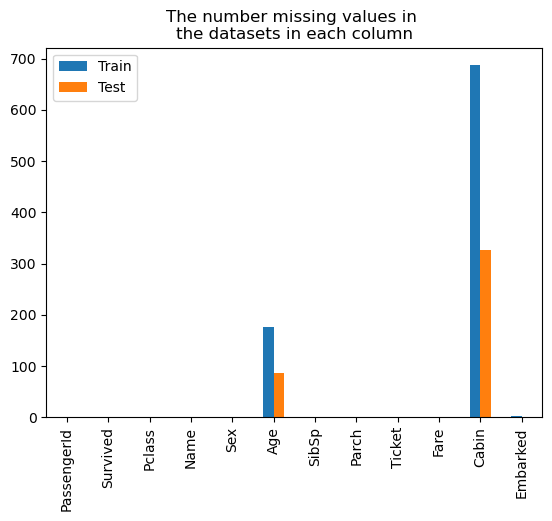

In [14]:
# stacking the two missing value tables & plotting them

viz = pd.concat([viz1, viz2])
viz.T.plot(kind='bar')

plt.title('The number missing values in \nthe datasets in each column') # title
plt.legend(labels=['Train', 'Test']);                                   # rename legend items

1. `viz = pd.concat([viz1, viz2])`: Concatenate the DataFrames `viz1` and `viz2` vertically into a new DataFrame called `viz`.
2. `viz.T.plot(kind='bar')`: Transpose the DataFrame `viz` and plot it as a bar chart using Pandas' built-in plotting function.
3. `plt.title('The number missing values in \nthe datasets in each column')`: Set the title of the plot to "The number missing values in the datasets in each column", with a line break for readability.
4. `plt.legend(labels=['Train', 'Test'])`: Rename the legend items in the plot to "Train" and "Test" corresponding to the concatenated DataFrames.

To deal with the missing values in `Age` & `Cabin` columns, we will:
- delete the `Cabin` column from both datasets
- impute (substitute) the missing values in the `Age` column with the mean age of the train dataset age column

In [15]:
# droping Cabin for both datasets

df_train.drop(columns=['Cabin'], inplace=True)
df_test.drop(columns=['Cabin'], inplace=True)

1. `df_train.drop(columns=['Cabin'], inplace=True)`: Drop the 'Cabin' column from the `df_train` DataFrame in place, meaning the modification is applied directly to the DataFrame object.
2. `df_test.drop(columns=['Cabin'], inplace=True)`: Drop the 'Cabin' column from the `df_test` DataFrame in place, applying the modification directly to the DataFrame object.

These lines of code remove the 'Cabin' column from both the `df_train` and `df_test` DataFrames, effectively dropping that column from the datasets.

In [16]:
# The mean ages in each datasets

print(f'\nThe mean (average) age in the train dataset is {df_train.Age.mean():.1f}')
print(f'The mean (average) age in the test dataset is {df_test.Age.mean():.1f} (very close)') # just out of curiosity 


The mean (average) age in the train dataset is 29.7
The mean (average) age in the test dataset is 30.3 (very close)


We are going to follow the convention above in the **Variable Notes** and impute the missing age values in both datasets with xx.5 since we are estimating. In this case the mean age is going to be 29.5 for the missing values.

In [17]:
# imputing values

print('\nBefore the change:\n')
print(f'The number of missing ages in the train dataset is {df_train.Age.isnull().sum()}')
print(f'While number of missing ages in the test dataset is {df_test.Age.isnull().sum()}')

df_train.loc[df_train.Age.isna(), 'Age'] = 29.5
df_test.loc[df_test.Age.isna(), 'Age'] = 29.5

print('\nAfter the change:\n')
print(f'The number of missing ages in the train dataset is {df_train.Age.isnull().sum()}')
print(f'While number of missing ages in the test dataset is {df_test.Age.isnull().sum()}')


Before the change:

The number of missing ages in the train dataset is 177
While number of missing ages in the test dataset is 86

After the change:

The number of missing ages in the train dataset is 0
While number of missing ages in the test dataset is 0


In [18]:
# here are the remaining missing values

display(df_train.isna()    
         .sum()      
         .to_frame() 
         .T          
         .rename(index={0:'Missing values'})) 

display(df_test.isna()    
         .sum()      
         .to_frame() 
         .T          
         .rename(index={0:'Missing values'})) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Missing values,0,0,0,0,0,0,0,0,0,0,2


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Missing values,0,0,0,0,0,0,0,0,1,0


In [19]:
# here are the last NaN values

print('\n Train data')
display(df_train[df_train.Embarked.isnull()])

print('\n Test data')
display(df_test[df_test.Fare.isnull()])


 Train data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN



 Test data


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


There are few missing values left. In the `train dataset`, there are 2 missing values while the `test dataset` has 1 missing value.

We can impute these three values by doing the following:
- for `train data`: impute `NaN` with the top (most frequent) Embarked location in the dataset
- for `test data`: impute the missing value mean fare of all `Embarked S` 

In [20]:
# information about the embarkations

print(f'\nThe mean fare from the Southampton (S) is {df_test.loc[df_test.Embarked=="S", "Fare"].mean():.2f}$')
print('\nWhile the top port of embarkation is S (Southampton):\n')

df_train.Embarked.value_counts().to_frame()


The mean fare from the Southampton (S) is 28.23$

While the top port of embarkation is S (Southampton):



,Embarked
S,644
C,168
Q,77


1. `df_test.loc[df_test.Embarked=="S", "Fare"].mean():.2f`: Compute the average fare (`mean()`) for passengers in the `df_test` DataFrame who embarked from "S" (Southampton) and format the result to two decimal places.
2. `df_train.Embarked.value_counts().to_frame()`: Count the occurrences of each unique value in the 'Embarked' column of the `df_train` DataFrame and present the counts as a DataFrame. This provides information on the distribution of embarkations.

Now, let's fix the last missing values using the above information! 

In [21]:
# here are imputations

df_train.loc[df_train.Embarked.isnull(), 'Embarked'] = 'S'
df_test.loc[df_test.Fare.isnull(), 'Fare'] = 28.0

# there are no more missing values

display(df_train.isna()    
         .sum()      
         .to_frame() 
         .T          
         .rename(index={0:'Missing values'})) 

display(df_test.isna()    
         .sum()      
         .to_frame() 
         .T          
         .rename(index={0:'Missing values'})) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Missing values,0,0,0,0,0,0,0,0,0,0,0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Missing values,0,0,0,0,0,0,0,0,0,0


1. `df_train.loc[df_train.Embarked.isnull(), 'Embarked'] = 'S'`: Replace the missing values (`NaN`) in the 'Embarked' column of the `df_train` DataFrame with the value 'S', indicating that the missing passengers embarked from Southampton.
2. `df_test.loc[df_test.Fare.isnull(), 'Fare'] = 28.0`: Replace the missing values (`NaN`) in the 'Fare' column of the `df_test` DataFrame with the value 28.0, assigning a default fare value for the missing entries.

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis is an approach to analyze and summarize the main characteristics of a dataset to gain insights and understanding about the data. EDA involves techniques and visualizations to examine the distribution, patterns, relationships, and outliers within the data. It helps in identifying trends, anomalies, and potential problems in the dataset, as well as guiding further data preprocessing and modeling decisions. EDA plays a crucial role in the initial stages of data analysis, allowing data scientists to explore and familiarize themselves with the data before diving into more advanced analysis or modeling tasks.

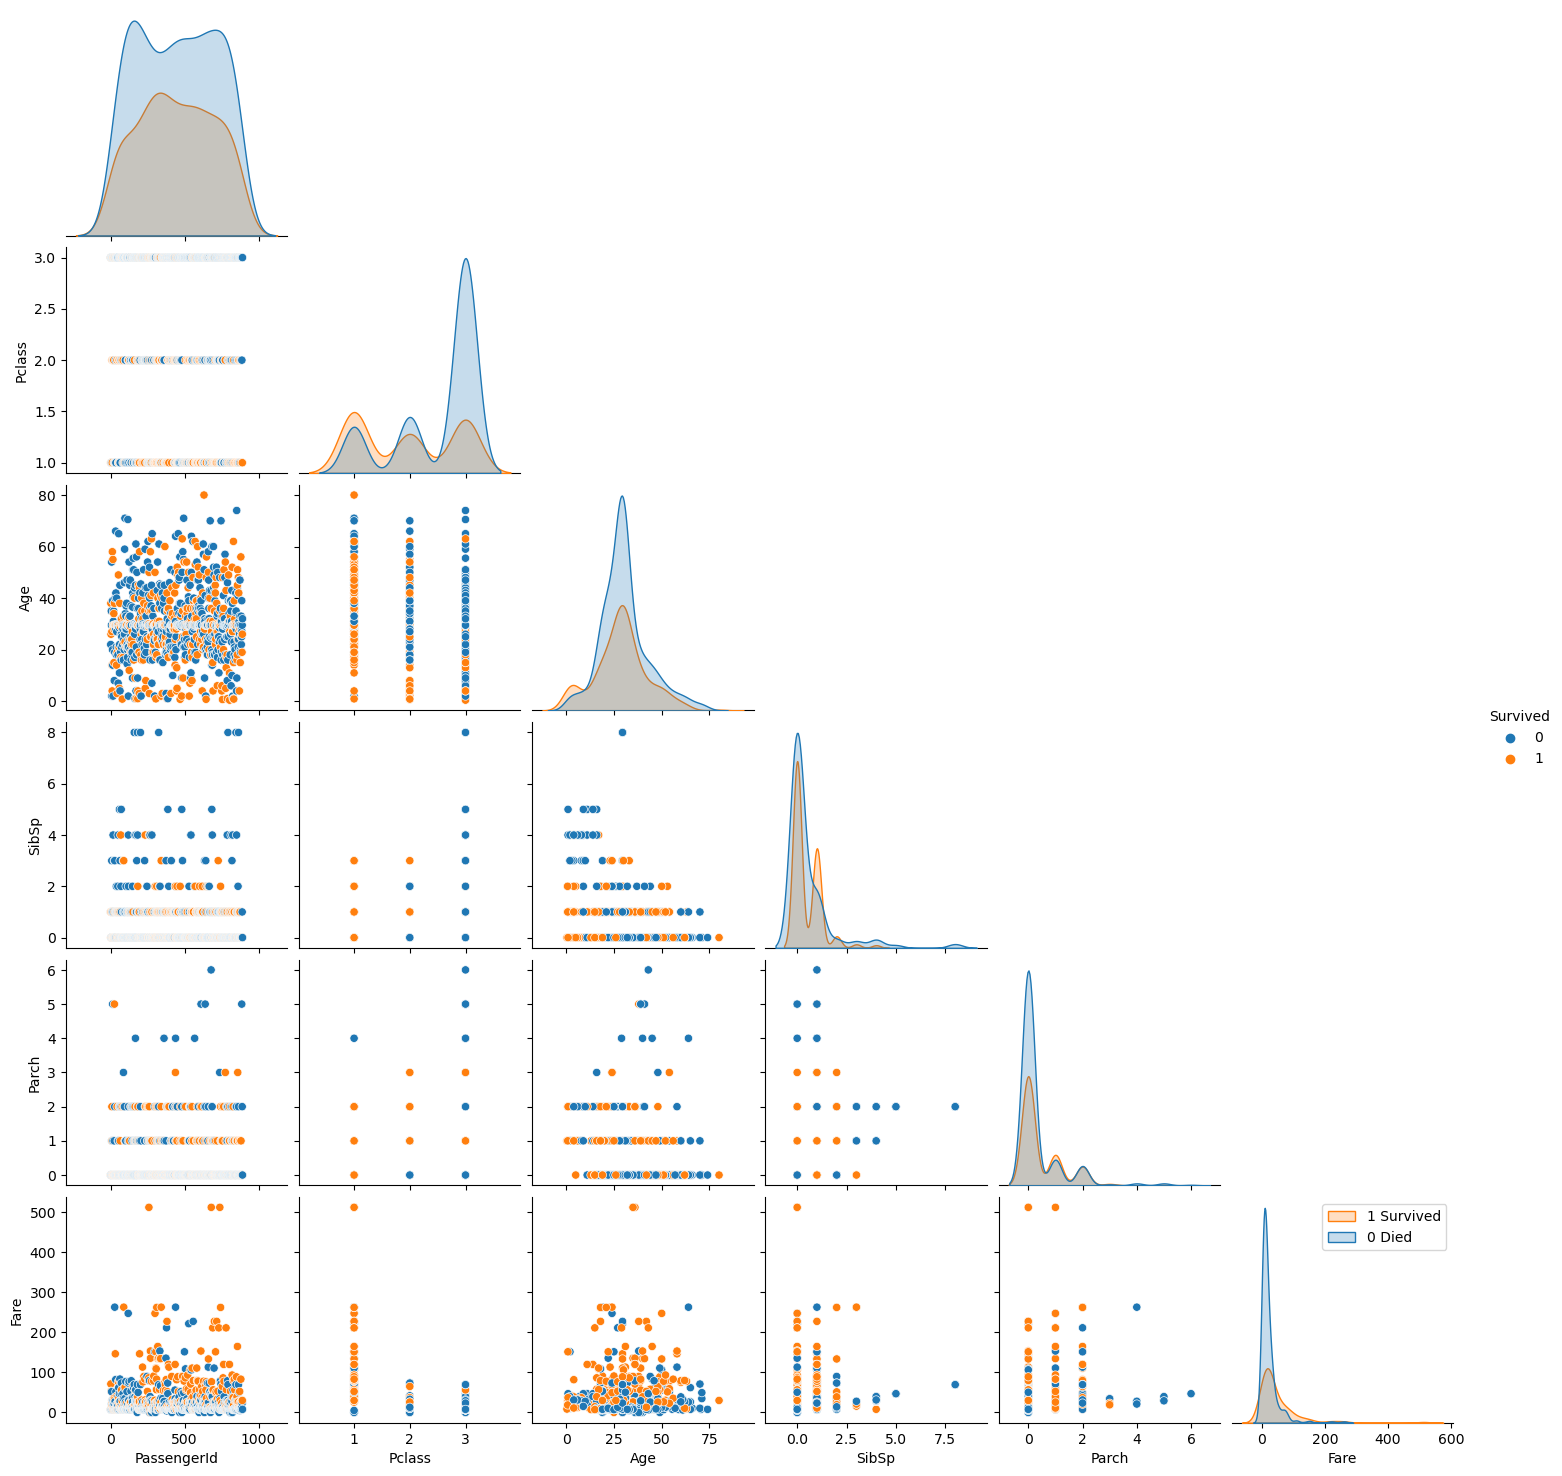

In [22]:
# plotting the relationships between the numerical variables

sns.pairplot(df_train, hue="Survived", corner=True)
plt.legend(labels=['1 Survived', '0 Died']);

1. `sns.pairplot(df_train, hue="Survived", corner=True)`: Create a pairwise scatter plot matrix using Seaborn's `pairplot` function for the `df_train` DataFrame, where each scatter plot is colored based on the 'Survived' column, and `corner=True` configures the plots to only appear in the lower triangle.
2. `plt.legend(labels=['1 Survived', '0 Died'])`: Add a legend to the plot with custom labels '1 Survived' and '0 Died', corresponding to the different values of the 'Survived' column.

A pairwise scatter plot is a type of plot that displays the relationship between pairs of variables in a dataset. It shows how two variables are related by plotting their values as points on a graph. 

In a pairwise scatter plot matrix, multiple scatter plots are arranged in a grid or matrix format, where each plot represents the relationship between a pair of variables. The variables are typically represented on the x-axis and y-axis of the plots, and each point on the plot represents a data point or observation in the dataset.

The scatter plots in a pairwise scatter plot matrix allow us to visually examine the correlation or patterns between variables. By plotting the points for different pairs of variables, we can observe how the variables interact or influence each other. This type of plot is particularly useful when dealing with multivariate datasets, as it provides a comprehensive view of the relationships between variables.

In the code snippet provided, `sns.pairplot(df_train, hue="Survived", corner=True)` generates a pairwise scatter plot matrix using the Seaborn library. The 'Survived' column is used to color the scatter plots, allowing the visualization of the relationship between variables while distinguishing between survived and deceased individuals.

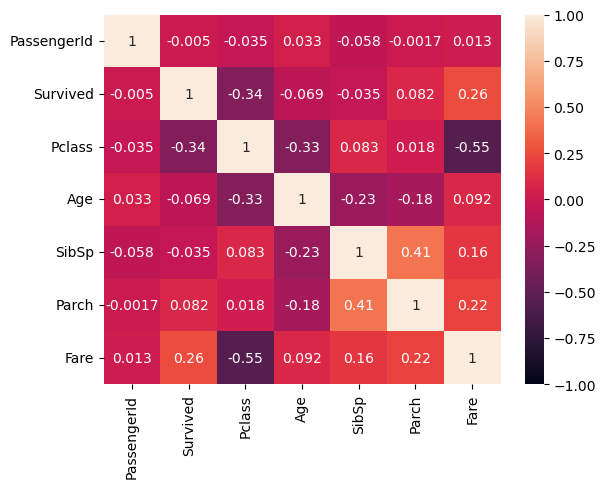

In [23]:
# plotting the correlations between the numerical variables

sns.heatmap(df_train.corr(numeric_only=True), annot=True, vmin=-1,
    vmax=1,
);

This line of code generates a heatmap plot using the correlation matrix of the numeric columns in the `df_train` DataFrame, with annotations displaying the correlation values and a color map ranging from -1 to 1 to represent the strength and direction of the correlations.

In the above charts (pairwise & heat map), we see weaker correlations among the numerical variables (nothing more than -0.55). Let's see if categorical variables can show us more insights.

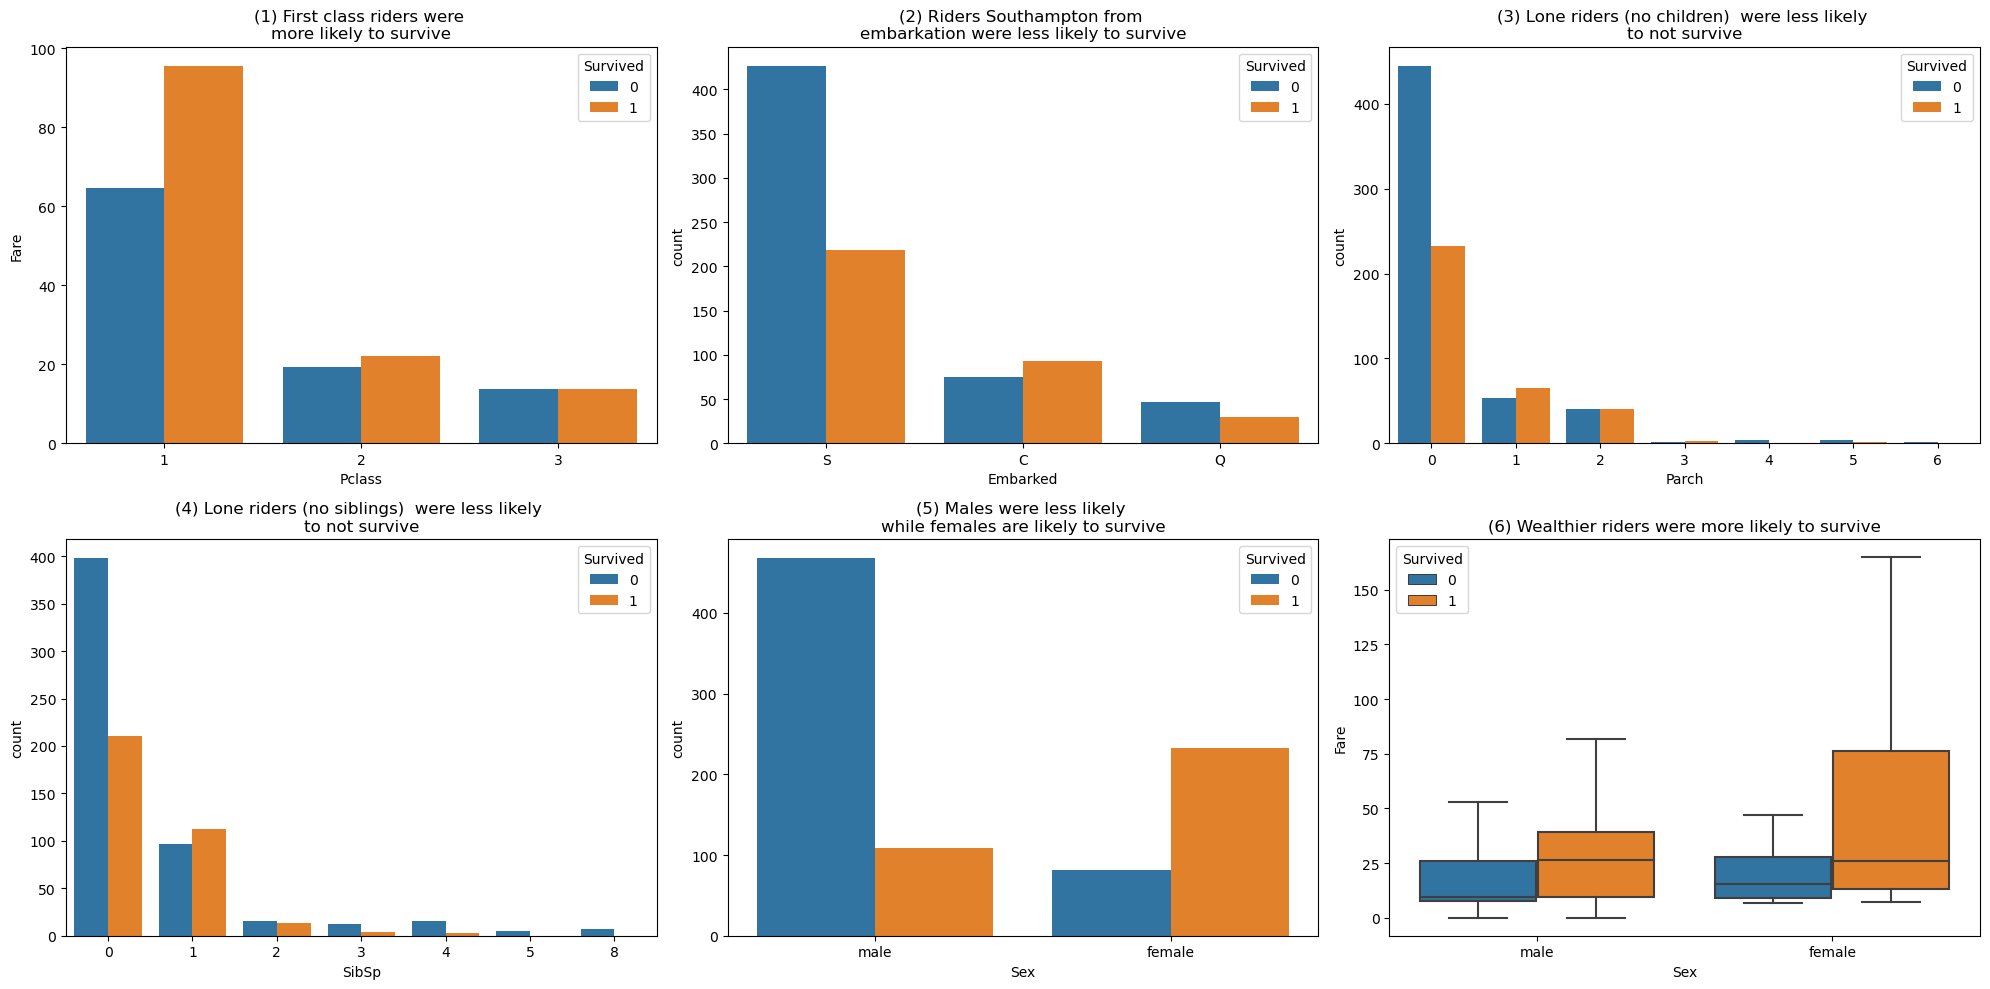

In [24]:
# Create subplots with desired layout

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

sns.barplot(data=df_train, x='Pclass', y='Fare', hue='Survived', errorbar=('ci', False), ax=axes[0, 0])
axes[0,0].set_title('(1) First class riders were \nmore likely to survive')

sns.countplot(data=df_train, x='Embarked', hue='Survived', ax=axes[0, 1])
axes[0,1].set_title('(2) Riders Southampton from \nembarkation were less likely to survive')

sns.countplot(data=df_train, hue="Survived", x="Parch", ax=axes[0, 2])
axes[0,2].set_title('(3) Lone riders (no children)  were less likely \nto not survive')

sns.countplot(data=df_train, hue="Survived", x="SibSp", ax=axes[1, 0])
axes[1,0].set_title('(4) Lone riders (no siblings)  were less likely \nto not survive')

sns.countplot(data=df_train, hue="Survived", x="Sex", ax=axes[1, 1])
axes[1,1].set_title('(5) Males were less likely \nwhile females are likely to survive')

sns.boxplot(data=df_train, x="Sex", y="Fare", hue='Survived', showfliers=False, ax=axes[1, 2])
axes[1,2].set_title('(6) Wealthier riders were more likely to survive')

plt.tight_layout()  # Adjust the spacing between subplots

plt.show()


In this code snippet:

1. `fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))`: Create a figure and an array of subplots with 2 rows and 3 columns, setting the overall figure size to 20x10 inches and assigning the figure object to `fig` and an array of axes objects to `axes`.
2. `sns.barplot(data=df_train, x='Pclass', y='Fare', hue='Survived', errorbar=('ci', False), ax=axes[0, 0])`: Create a bar plot using the `df_train` DataFrame, where 'Pclass' is plotted on the x-axis, 'Fare' on the y-axis, and the bars are colored based on the 'Survived' column. Additionally, confidence intervals are not shown (`errorbar=('ci', False)`), and the plot is assigned to the first subplot in the `axes` array (`axes[0, 0]`).
3. `axes[0,0].set_title('(1) First class riders were \nmore likely to survive')`: Set the title of the first subplot to '(1) First class riders were more likely to survive'.

...

4. `plt.tight_layout()`: Adjust the spacing between subplots to avoid overlapping.
5. `plt.show()`: Display the plot.

These lines of code create a figure with multiple subplots, plot a bar chart in one of the subplots, set the subplot title, adjust the layout to avoid overlapping, and finally display the plot.

**When visualizing the categorical variables with some numerical ones, we see the following insights:**
- (1 & 6) Persons who payed more (first class ticket holders) had more survivers than the other classes
- (2) People who got on from the Southampton embarkation (first embarkation) were the least fortunate ones, a lot of them died
- (3 & 4) Riders with no children/parents or sibilings were less likely to survive
- (5) More females than males survived, perhaps priority was given to women and children 

# Data Preprocessing
Make the datasets machine learning-ready!

Data preprocessing refers to the steps taken to transform raw data into a format that is suitable and optimized for machine learning algorithms. It involves various techniques and operations applied to the data to handle missing values, scale features, handle categorical variables, normalize data, and more.

The goal of data preprocessing is to ensure that the data is in a suitable form that allows machine learning models to learn patterns, make accurate predictions, and derive meaningful insights. By preparing the datasets in a machine learning-ready format, the data is better suited for training, evaluating, and deploying machine learning models.

In [25]:
# the number of unique items/values in each column

df_train.nunique().to_frame().T.rename({0:'Unique Items'})

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Unique Items,891,2,3,891,2,89,7,7,681,248,3


The `df_train.nunique()` function returns the number of unique values for each column in the `df_train` DataFrame. 

When applied to a DataFrame, `nunique()` calculates the number of distinct or unique values present in each column. It provides a count of unique values for categorical variables or discrete numerical variables. 

By using `df_train.nunique()`, you can gain insights into the diversity of values within each column of the DataFrame, helping to understand the variability and richness of the data.

In [26]:
# dropping variables that have high number of unique items
# such as Ticket, Name, PassengerId

df_train.drop(columns=['Ticket', 'Name', 'PassengerId'], inplace=True)
df_test.drop(columns=['Ticket', 'Name', 'PassengerId'], inplace=True)

# displaying the data

print('\n train data \n')
display(df_train.head())

print('\n test data \n')
display(df_test.head())


 train data 



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S



 test data 



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [27]:
# One-hot encode the categorical variables
# making them 0 or 1

df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

# displaying the data

print('\n train data \n')
display(df_train.head())

print('\n test data \n')
display(df_test.head())


 train data 



,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1



 test data 



,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


These lines of code perform one-hot encoding on the categorical variables in the `df_train` and `df_test` DataFrames, converting them into binary columns to represent different categories or levels of the original variables.

These lines of code convert categorical variables (such as "Sex" or "Embarked") in the `df_train` and `df_test` datasets into multiple binary columns. Each binary column represents a different category or level of the original variable, making it easier for machine learning algorithms to work with categorical data.

In [28]:
# splitting the data

x_train = df_train.copy().drop(columns=['Survived'])
y_train = df_train.copy().pop('Survived')
test    = df_test.copy()

1. `x_train = df_train.copy().drop(columns=['Survived'])`: Create a copy of the `df_train` DataFrame and assign it to `x_train`, removing the 'Survived' column, which contains the target variable.
2. `y_train = df_train.copy().pop('Survived')`: Create a copy of the `df_train` DataFrame and assign it to `y_train`, extracting the 'Survived' column as the target variable.
3. `test = df_test.copy()`: Create a copy of the `df_test` DataFrame and assign it to `test`, which will be used for testing or making predictions.

In [29]:
# normalizing the datasets

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
test_scaled = scaler.transform(df_test)

1. `scaler = StandardScaler()`: Create an instance of the `StandardScaler` class, which will be used to **normalize** the data.
2. `x_train_scaled = scaler.fit_transform(x_train)`: Apply the `fit_transform` method of the `StandardScaler` object to normalize the `x_train` dataset, scaling each feature to have zero mean and unit variance.
3. `test_scaled = scaler.transform(df_test)`: Use the `transform` method of the `StandardScaler` object to normalize the `df_test` dataset based on the mean and variance obtained from the `x_train` dataset. This ensures consistency in scaling between the training and testing datasets.

Normalization is important in machine learning for the following reasons:

1. **Equalizes the scales**: Different features in a dataset may have varying scales and ranges. Normalization brings all features to a common scale, preventing certain features from dominating others solely due to their scale. This is particularly crucial for distance-based algorithms like k-nearest neighbors (KNN) or clustering algorithms.

2. **Improves convergence**: Many machine learning algorithms, such as gradient descent-based optimization algorithms used in neural networks, converge faster when the features are normalized. Normalization prevents the algorithm from taking longer paths or getting stuck in local optima.

3. **Mitigates numerical instability**: Normalization helps stabilize numerical calculations by avoiding large values that may lead to overflow or underflow issues in computations. It helps maintain numerical stability during the training process.

4. **Enables meaningful comparisons**: Normalization ensures that different features have a comparable impact on the model. Without normalization, features with larger scales may dominate the model's decision-making process, leading to biased or inaccurate results.

5. **Facilitates interpretation**: Normalized features are easier to interpret and compare. The values are typically within a specific range, making it simpler to understand and explain the impact of different features on the model's predictions.

Overall, normalization plays a crucial role in ensuring fair, efficient, and accurate machine learning model training by handling scale differences, improving convergence, and enabling meaningful feature comparisons.

In [30]:
# displaying the data

print('\n train data \n')
display(x_train_scaled[:2])

print('\n test data \n')
display(test_scaled[:2])


 train data 



array([[ 0.82737724, -0.58942563,  0.43279337, -0.47367361, -0.50244517,
        -0.73769513,  0.73769513, -0.48204268, -0.30756234,  0.61583843],
       [-1.56610693,  0.64182097,  0.43279337, -0.47367361,  0.78684529,
         1.35557354, -1.35557354,  2.0745051 , -0.30756234, -1.62380254]])


 test data 



array([[ 0.82737724,  0.37248578, -0.4745452 , -0.47367361, -0.49078316,
        -0.73769513,  0.73769513, -0.48204268,  3.25137334, -1.62380254],
       [ 0.82737724,  1.33439719,  0.43279337, -0.47367361, -0.50747884,
         1.35557354, -1.35557354, -0.48204268, -0.30756234,  0.61583843]])

Now the data is in array form (organized in lists) rather than tables. It's now ready to be feed into prediction models.

# Prediction
We will be using `tensorflow` and `keras` to predict survival using neural network. One benefit of neural networks is that they figure out how to better predict outcomes by themselves.

Neural networks, also known as artificial neural networks (ANNs), are computational models inspired by the structure and function of the human brain's neural networks. They are a subset of machine learning algorithms that excel at learning complex patterns and relationships from data.

A neural network consists of interconnected nodes, called artificial neurons or units, organized in layers. The layers are typically divided into an input layer, one or more hidden layers, and an output layer. Each neuron takes inputs, performs a mathematical computation, and produces an output. The outputs from one layer serve as inputs to the next layer, allowing information to flow through the network.

The connections between neurons in a neural network are represented by weights. During the learning or training process, these weights are adjusted to minimize the difference between the predicted outputs and the actual outputs. This optimization is typically achieved using algorithms like gradient descent and backpropagation, which update the weights based on the error or loss calculated during training.

Neural networks have gained popularity due to their ability to learn and recognize complex patterns, perform tasks like image and speech recognition, natural language processing, and make predictions or classifications based on input data. They are a fundamental component of deep learning, a subfield of machine learning that focuses on networks with many layers, known as deep neural networks.

Overall, neural networks are powerful models capable of learning from large amounts of data and extracting meaningful insights, making them widely used in various domains, including computer vision, natural language processing, and many other areas of artificial intelligence.

---

TensorFlow and Keras are popular frameworks used for building and training deep learning models.

1. **TensorFlow**: TensorFlow is an open-source machine learning framework developed by Google. It provides a comprehensive ecosystem of tools, libraries, and resources for building and deploying machine learning models. TensorFlow offers a flexible and scalable architecture that supports a wide range of tasks, from training simple neural networks to complex deep learning models. It allows efficient computation on both CPUs and GPUs, making it suitable for various hardware configurations. TensorFlow provides low-level APIs for advanced customization and higher-level APIs for ease of use.

2. **Keras**: Keras is an open-source neural network library written in Python. It provides a high-level, user-friendly interface to build and train deep learning models. Keras is built on top of TensorFlow and serves as a wrapper that simplifies the process of defining and training neural networks. It offers a collection of pre-defined layers, optimizers, and loss functions, making it easy to assemble models. Keras supports both sequential and functional model architectures, allowing users to create a wide range of neural network architectures. It focuses on simplicity, modularity, and extensibility, enabling rapid experimentation and prototyping.

Together, TensorFlow and Keras provide a powerful combination for developing deep learning models. TensorFlow offers a robust framework for handling computations, while Keras provides an intuitive and user-friendly interface for building neural networks. This combination allows developers and researchers to leverage the strengths of both frameworks for efficient model development and deployment.

In [31]:
# creating the model

tf.random.set_seed(42) # for more consistent results

model = keras.Sequential(
    [
        
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(64, activation="relu"),
        layers.BatchNormalization(), # new
        layers.Dense(32, activation="relu"), # new
        layers.Dense(1),
        layers.Activation('sigmoid')
    ]
)

1. `tf.random.set_seed(42)`: Set the random seed to 42 to ensure more consistent results across different runs of the model.
2. `model = keras.Sequential([...])`: Create a sequential model using the Keras Sequential API and assign it to the variable `model`.
3. `layers.Dense(64, activation="relu")`: Add a fully connected layer with 64 neurons and ReLU activation function to the model.
4. `layers.Dropout(0.3)`: Add a dropout layer with a dropout rate of 0.3 to the model, which helps prevent overfitting by randomly dropping a fraction of the inputs during training.
5. `layers.BatchNormalization()`: Add a batch normalization layer to the model, which normalizes the inputs to each neuron, improving training speed and stability.
6. `layers.Dense(32, activation="relu")`: Add another fully connected layer with 32 neurons and ReLU activation function to the model.
7. `layers.Dense(1)`: Add a final fully connected layer with 1 neuron, representing the output layer.
8. `layers.Activation('sigmoid')`: Apply the sigmoid activation function to the output layer to obtain probabilities between 0 and 1.

In [32]:
# putting the model together

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.BinaryAccuracy()],
)

This code is responsible for configuring the model for training.

1. `model.compile(...)`: Configure the model for training by specifying the optimizer, loss function, and metrics to be used during the training process.
2. `optimizer=keras.optimizers.Adam(learning_rate=0.0001)`: Set the optimizer to Adam with a learning rate of 0.0001, which is a popular optimization algorithm for neural networks.
3. `loss=keras.losses.BinaryCrossentropy()`: Set the loss function to binary cross-entropy, which is commonly used for binary classification problems.
4. `metrics=[keras.metrics.BinaryAccuracy()]`: Specify the metric to monitor during training, which in this case is binary accuracy, measuring the accuracy of the model's binary predictions.

In [33]:
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=60)

Epoch 1/60
26/26 [==============================] - 2s 15ms/step - loss: 0.7170 - binary_accuracy: 0.5880 - val_loss: 0.6590 - val_binary_accuracy: 0.7333
Epoch 2/60
26/26 [==============================] - 0s 4ms/step - loss: 0.6679 - binary_accuracy: 0.6754 - val_loss: 0.6458 - val_binary_accuracy: 0.7778
Epoch 3/60
26/26 [==============================] - 0s 4ms/step - loss: 0.6220 - binary_accuracy: 0.6754 - val_loss: 0.6301 - val_binary_accuracy: 0.8000
Epoch 4/60
26/26 [==============================] - 0s 5ms/step - loss: 0.5637 - binary_accuracy: 0.7079 - val_loss: 0.6121 - val_binary_accuracy: 0.8000
Epoch 5/60
26/26 [==============================] - 0s 5ms/step - loss: 0.5642 - binary_accuracy: 0.7441 - val_loss: 0.5914 - val_binary_accuracy: 0.8111
Epoch 6/60
26/26 [==============================] - 0s 5ms/step - loss: 0.5539 - binary_accuracy: 0.7428 - val_loss: 0.5692 - val_binary_accuracy: 0.8111
Epoch 7/60
26/26 [==============================] - 0s 5ms/step - loss: 0.5

This line of code trains the model using the provided training data.

1. `history = model.fit(...)`: Train the model using the `fit` method, which performs the training iterations.
2. `x_train_scaled, y_train`: Provide the scaled training features (`x_train_scaled`) and corresponding labels (`y_train`) to the `fit` method.
3. `validation_split=0.1`: Specify a validation split of 0.1, indicating that 10% of the training data will be used for validation during training.
4. `epochs=60`: Set the number of training epochs to 60, indicating how many times the model will iterate over the entire training dataset during the training process.
5. `history`: Store the training history, which contains information about the loss and metrics values at each epoch.

**Loss**: Loss is a measure that tells us how well our neural network is predicting the correct outputs compared to the actual outputs. The goal is to minimize the loss value, which means the model is making more accurate predictions.

**Metrics**: Metrics are additional measures used to evaluate the performance of the neural network. They provide specific information about how well the model is doing on a particular task. For example, accuracy tells us the percentage of correct predictions, precision measures the model's ability to make correct positive predictions, recall measures the model's ability to find all positive instances, and so on.

During training, the neural network adjusts its parameters to minimize the loss value, improving its predictions. Metrics help us understand how well the model is performing beyond just the loss value, allowing us to assess its accuracy, precision, and other relevant aspects.

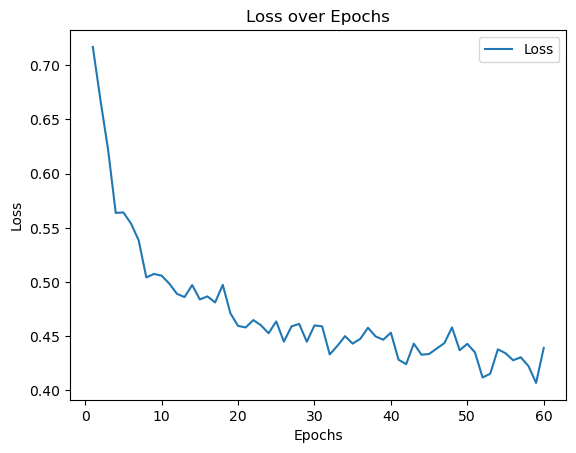

In [34]:
# accessing the loss values from the history object
losses = model.history.history['loss']

# creating x-axis values (epochs)
epochs = range(1, len(losses) + 1)

# plotting the losses
plt.plot(epochs, losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

We can see here that the loss is decreasing each epochs. This means the model is learning from the data. But, it flattens towards the end. Meaning it has reached a point where further training may not significantly improve its performance or reduce the loss. This phenomenon is often observed when the model has learned as much as it can from the available data, and additional epochs may lead to overfitting or minimal improvement. It's important to monitor the loss and consider stopping the training process at an optimal point to prevent overfitting and achieve the desired model performance.

In [49]:
loss, binacc = model.evaluate(x_train_scaled, y_train, verbose=0)

print('\nloss:', loss, '\n')
print('binary accuracy:', binacc, '\n')


loss: 0.3874819278717041 

binary accuracy: 0.8406285047531128 



This line of code is evaluating the trained model's performance on the training data.

1. `model.evaluate(...)`: Evaluate the model's performance using the `evaluate` method, which calculates the loss and metrics specified during model compilation.
2. `x_train_scaled, y_train`: Provide the scaled training features (`x_train_scaled`) and corresponding labels (`y_train`) to the `evaluate` method.
3. `verbose=0`: Set the verbosity level to 0, which means no progress or log messages will be displayed during evaluation.
4. `loss, binacc`: Store the values of the computed loss and binary accuracy in the variables `loss` and `binacc`, respectively. These values represent the model's performance on the training data.

In [36]:
# using the model to predict the unlabeled data (from the test dataset)

predictions = model.predict(test_scaled)

14/14 [==============================] - 0s 2ms/step


This line of code is using the trained model to make predictions on unlabeled data from the test dataset.

1. `model.predict(...)`: Apply the trained model's prediction capability using the `predict` method, which takes the test data as input.
2. `test_scaled`: Provide the scaled test data (`test_scaled`) to the `predict` method.
3. `predictions`: Store the predicted outputs generated by the model for the test data. These predictions represent the model's estimated labels or values for the unlabeled test instances.

In [37]:
# putting the submission together

Submission = pd.DataFrame(data={'PassengerId':PassengerId, 'Survived':[1 if x > 0.6 else 0 for x in predictions]})
Submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


This code is assembling the submission file by creating a DataFrame with the passenger IDs and corresponding predicted survival labels.

1. `Submission = pd.DataFrame(...)`: Create a new DataFrame called `Submission` to hold the submission data.
2. `data={'PassengerId':PassengerId, 'Survived':[1 if x > 0.5 else 0 for x in predictions]}`: Specify the data for the DataFrame, where the 'PassengerId' column contains the passenger IDs and the 'Survived' column is generated based on the predicted values. If the prediction value is greater than 0.5, it is set as 1 (indicating survival), otherwise, it is set as 0 (indicating not survived).
3. `Submission.head()`: Display the first few rows of the `Submission` DataFrame to get a preview of the assembled submission file.

**This basic neural network model achieves a `78.4%` accuracy on the test dataset.** Which means that the model correctly predicted the survival outcome for approximately 78.4% of the instances in the test dataset. This accuracy indicates the model's overall performance in classifying whether a passenger survived or not based on the given features.

In [39]:
# saving the predictions in a csv file for submission

Submission.to_csv('submission.csv', index=False)

This line of code saves the `Submission` DataFrame as a CSV file named 'submission.csv', excluding the index column.

---

# Random Forests
Now, let's try different learning & predicting models. A popular option is Random Forests.

Random Forests is a popular ensemble learning method in machine learning that combines multiple decision trees to make predictions. It constructs a large number of decision trees during training, where each tree is built using a random subset of the training data and a random subset of the features. The final prediction is made by aggregating the predictions of all the individual trees, either through voting (for classification) or averaging (for regression). Random Forests are known for their robustness, ability to handle high-dimensional data, and resistance to overfitting. They are widely used for tasks such as classification, regression, and feature selection in various domains.

Decision Trees are a type of supervised machine learning algorithm used for both classification and regression tasks. They represent a flowchart-like structure where each internal node represents a feature or attribute, each branch represents a decision or rule based on that attribute, and each leaf node represents the outcome or prediction.

The algorithm recursively splits the data based on different attributes, aiming to maximize the separation of the target variable classes or minimize the prediction error. The splitting process is guided by criteria such as Gini impurity or information gain, which measure the homogeneity or purity of the target variable within each branch.

Decision Trees provide interpretable models that can handle both categorical and numerical features. They can capture non-linear relationships, handle missing values, and handle outliers to some extent. However, they can be prone to overfitting when the trees become too complex. Ensemble methods like Random Forests are often used to overcome this limitation and improve performance. Decision Trees are widely used in various domains, including finance, healthcare, and marketing, due to their simplicity and interpretability.

In [40]:
%%capture 

# capture: no printing of any output

# install the new learning model

!pip install tensorflow_decision_forests
import tensorflow_decision_forests as tfdf

The `%%capture` magic command is used to prevent the printing of any output within a Jupyter Notebook cell.

The following lines of code install the `tensorflow_decision_forests` library, which is a Python package for using decision forest models in TensorFlow.

After the installation, the library is imported and assigned the alias `tfdf`, allowing us to use its functionalities in the subsequent code.

In [41]:
# check the version of TensorFlow Decision Forests

print("Found TensorFlow Decision Forests v" + tfdf.__version__)

Found TensorFlow Decision Forests v1.3.0


In [52]:
%%capture 

# specify the model

model_ds = tfdf.keras.RandomForestModel()

# Train the model

model_ds.fit(x_train_scaled, y_train)

[INFO 23-06-30 01:11:33.3863 UTC kernel.cc:1242] Loading model from path /tmp/tmpeopg1qbc/model/ with prefix bcb37456425a43f9
[INFO 23-06-30 01:11:33.5818 UTC decision_forest.cc:660] Model loaded with 300 root(s), 46048 node(s), and 10 input feature(s).
[INFO 23-06-30 01:11:33.5818 UTC abstract_model.cc:1311] Engine "RandomForestOptPred" built
[INFO 23-06-30 01:11:33.5818 UTC kernel.cc:1074] Use fast generic engine


In these lines of code, a random forest model is specified using the `tfdf.keras.RandomForestModel()` function, which creates an instance of the random forest model.

The `fit()` method is then called on the model to train it using the scaled training data `x_train_scaled` and corresponding labels `y_train`. The model will learn from the provided data and adjust its internal parameters to make predictions based on the learned patterns.

Again, we predict and save the predictions. Then putting the predictions and Ids together in a table (DataFrame).

In [44]:
# using the model to predict the unlabeled data (from the test dataset)

predictions_ds = model_ds.predict(test_scaled)

14/14 [==============================] - 0s 3ms/step


In [45]:
# putting the submission together

Submission_ds = pd.DataFrame(data={'PassengerId':PassengerId, 'Survived':[1 if x > 0.5 else 0 for x in predictions_ds]})
Submission_ds.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [46]:
# submits the results of the decision tree model (random forest)

# Submission.to_csv('submission.csv', index=False) 

# commented out to allow the first submission to be the one counted

**This basic Random Forest model achieves a `77.7%` accuracy on the test dataset.**

This code below is creating an instance of the Gradient Boosted Trees model using the `tfdf.keras.GradientBoostedTreesModel()` function.

The model is configured with several parameters:

- `num_trees`: It specifies the number of trees to be grown in the gradient boosting process, set to 500 in this case.
- `growing_strategy`: It determines the strategy used for growing the trees, with "BEST_FIRST_GLOBAL" indicating the best-first global strategy.
- `max_depth`: It sets the maximum depth allowed for each tree to be 8.
- `split_axis`: It defines the splitting axis strategy as "SPARSE_OBLIQUE".
- `categorical_algorithm`: It specifies the algorithm used for handling categorical features as "RANDOM".

These parameter values are based on the tutorial mentioned in the comment and are chosen to customize the behavior of the Gradient Boosted Trees model.

Gradient Boosted Trees (GBT) and Random Forest (RF) are both ensemble learning methods that use decision trees as their base models. However, there are some key differences between them.

In [47]:
# A more complex, but possibly, more accurate model.

model_ds2 = tfdf.keras.GradientBoostedTreesModel(
    num_trees=500,
    growing_strategy="BEST_FIRST_GLOBAL",
    max_depth=8,
    split_axis="SPARSE_OBLIQUE",
    categorical_algorithm="RANDOM",
    ) # params are from https://www.tensorflow.org/decision_forests/tutorials/beginner_colab#re-train_the_model_with_a_different_learning_algorithm

model_ds2.fit(x_train_scaled, y_train)

predictions_ds2 = model_ds.predict(test_scaled)

Submission_ds = pd.DataFrame(data={'PassengerId':PassengerId, 'Survived':[1 if x > 0.5 else 0 for x in predictions_ds2]})
Submission.to_csv('submission.csv', index=False)
Submission_ds.head()

Use /tmp/tmpmagraa_4 as temporary training directory
Reading training dataset...


[WARNING 23-06-30 00:52:02.8707 UTC gradient_boosted_trees.cc:1797] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-06-30 00:52:02.8708 UTC gradient_boosted_trees.cc:1808] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-06-30 00:52:02.8708 UTC gradient_boosted_trees.cc:1822] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.327510. Found 891 examples.
Training model...
Model trained in 0:00:01.298395
Compiling model...


[INFO 23-06-30 00:52:04.4977 UTC kernel.cc:1242] Loading model from path /tmp/tmpmagraa_4/model/ with prefix 2283f6acbd2c4108
[INFO 23-06-30 00:52:04.5065 UTC decision_forest.cc:660] Model loaded with 30 root(s), 1828 node(s), and 10 input feature(s).
[INFO 23-06-30 00:52:04.5065 UTC kernel.cc:1074] Use fast generic engine


Model compiled.
14/14 [==============================] - 0s 3ms/step


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


**This more complex Random Forest model achieves a 77.0% accuracy on the test dataset.**

# Final words!

Embarking on this analysis may initially appear daunting, but with dedicated effort, it all came together. The key is to take incremental steps and follow a clear roadmap: starting with data validation, proceeding to exploratory analysis through visualizations, conducting data preprocessing, and finally making predictions.

I genuinely hope you find this information helpful and beneficial to your data analysis journey!